In [1]:
%reload_ext autoreload
%autoreload 2

from routes import experiment
import numpy as np
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
LAYER_THRESHOLD = np.logspace(-1, -4, num=10)
N_LAYERS = [3]
N_ROUNDS_SINCE_ROUTE = 1
N_ROUTES = 10
N_EXPERIMENTS = 10
PERIOD = timedelta(seconds=12)

layers_df, routes_df = experiment.run_experiments_set(N_LAYERS, LAYER_THRESHOLD,
                                                      N_ROUNDS_SINCE_ROUTE, N_ROUTES,
                                                      N_EXPERIMENTS, PERIOD)

[0:00:28.461088] Experiment 1/10 done.
[0:01:00.686745] Experiment 2/10 done.
[0:01:30.789392] Experiment 3/10 done.


In [17]:
# median absolute deviation 
def mad(x):
    return np.median(np.absolute(x - np.median(x)))

data_median = np.empty((len(LAYER_THRESHOLD), 3), dtype=np.float64)
data_mean = np.empty((len(LAYER_THRESHOLD), 3), dtype=np.float64)
for i, layer_threshold in enumerate(LAYER_THRESHOLD):
    df = layers_df[layers_df['layer_threshold'] == layer_threshold]
    
    data_median[i] = [layer_threshold, df['layer_size'].median(), mad(df['layer_size'])]
    data_mean[i] = [layer_threshold, df['layer_size'].mean(), df['layer_size'].std()]

print(data_median)
print(data_mean)

[[  1.00000000e-01   2.00000000e+00   0.00000000e+00]
 [  4.64158883e-02   2.00000000e+00   0.00000000e+00]
 [  2.15443469e-02   3.00000000e+00   1.00000000e+00]
 [  1.00000000e-02   3.50000000e+00   5.00000000e-01]
 [  4.64158883e-03   4.00000000e+00   1.00000000e+00]
 [  2.15443469e-03   4.00000000e+00   1.00000000e+00]
 [  1.00000000e-03   5.00000000e+00   1.00000000e+00]
 [  4.64158883e-04   5.00000000e+00   1.00000000e+00]
 [  2.15443469e-04   6.00000000e+00   1.00000000e+00]
 [  1.00000000e-04   6.00000000e+00   1.00000000e+00]]
[[  1.00000000e-01   2.06333333e+00   7.58004480e-01]
 [  4.64158883e-02   2.46333333e+00   7.41950486e-01]
 [  2.15443469e-02   2.84000000e+00   8.96518722e-01]
 [  1.00000000e-02   3.57666667e+00   1.05886395e+00]
 [  4.64158883e-03   3.97333333e+00   1.12999048e+00]
 [  2.15443469e-03   4.43333333e+00   1.19875446e+00]
 [  1.00000000e-03   4.78000000e+00   1.09952863e+00]
 [  4.64158883e-04   5.26000000e+00   1.27455153e+00]
 [  2.15443469e-04   5.8233

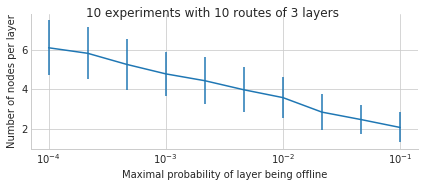

In [34]:
fig, ax = plt.subplots(figsize=(6, 2.6))
sns.despine()
sns.set_style("whitegrid")

#ax.plot(data_mean[:, 0], data_mean[:, 1])
ax.errorbar(data_mean[:, 0], data_mean[:, 1], yerr=data_mean[:, 2])

#ax.set_xscale('log')
ax.semilogx()
ax.set_xlabel("Maximal probability of layer being offline")
ax.set_ylabel("Number of nodes per layer")


plt.suptitle("10 experiments with 10 routes of 3 layers")
plt.tight_layout()
plt.savefig("outputs/number_of_nodes_vs_threshold.svg")
plt.show()